In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tf_robot_learning as rl
from tf_robot_learning import kinematic as tk

%load_ext autoreload
%autoreload 2


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
sess = tf.compat.v1.InteractiveSession()
tf.compat.v1.disable_eager_execution()

In [3]:
rl.datapath

'/home/pignate/code/pbdlib/tf_robot_learning/data'

In [4]:
urdf = tk.urdf_from_file(
	rl.datapath + '/urdf/panda_arm_gripper.urdf')

chain = tk.kdl_chain_from_urdf_model(
    urdf,
    tip='panda_leftfinger_tip'
)

In [5]:
q = tf.compat.v1.placeholder(tf.float32, (None, 7))

In [41]:
xs = chain.xs(q, layout=tk.FkLayout.xm) # get the forward position of each link

In [28]:
_xs = sess.run(xs, {q: np.ones((10, 7))})

/home/pignate/code/pbdlib/tf_robot_learning/tf_robot_learning/kinematic/chain.py:220: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  else: plt.axes().set_aspect('equal')


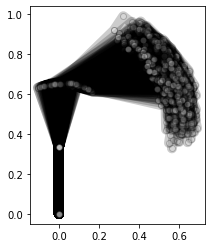

In [29]:
# xs is [batch_size = 1, number of links = 12, position + rotation matrix = 12]
dims = [0, 2]

_samples_xs = sess.run(
	xs,
	{q: np.random.multivariate_normal(
		chain.mean_pose, 0.1 ** 2 * np.eye(7), (batch_size, ))})

chain.plot(
	_samples_xs, dim=dims, alpha=0.2, color='k')

plt.show()

In [30]:
%timeit sess.run(xs,{q: np.random.multivariate_normal(chain.mean_pose, 0.1 ** 2 * np.eye(7), (batch_size, ))})

2.45 ms ± 104 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
